# NumPy Fundamentals for Data Science and Machine Learning

## Table of contents

- [Python is slow](#python-is-slow)
- [What is NumPy](#what-is-numpy)
- [Installing NumPy](#installing-numpy)
- [NumPy Arrays](#numpy-arrays)
- [Array creation](#array-creation)
    - [Conversion from other Python structures](#conversion-from-other-python-structures)
    - [Intrinsic NumPy array creation objects](#intrinsic-numpy-array-creation-objects) 
    - [Use of special library functions](#use-of-special-library-functions)
- [Array data type and conversions](#array-data-type-and-conversions)
- [Array mathematics and element-wise operations](#array-mathematics-and-element-wise-operations)
    - [Array arithmetic](#array-arithmetic)
    - [Trigonometric functions](#trigonometric-functions)
    - [Hyperbolic functions](#hyperbolic-functions)
    - [Rounding](#rounding)
    - [Other element-wise operations](#other-element-wise-operations)
- [Array manipulation](#array-manipulation)
    - [Array shape manipulation](#array-shape-manipulation)
    - [Array transpose-like operations](#array-transpose-like-operations)
    - [Array dimension manipulation](#array-dimension-manipulation)
    - [Array broadcasting](#array-broadcasting)
- [Array indexing]
- [Array masking]
- [NumPy universal functions]
- [Array copy and views]
- [Array logic and evaluation]
- [Basic statistics with NumPy]
- [NumPY Random sampling]
- [Array string operations]
- [NumPY datetime functions]
- [Structured arrays]
- [Array iteration]
- [NumPy constants and scalars]
- [Input-output (I/O) data processing]
- [Resources to learn more]

## Python is slow

Scientific and numerical computing often requires processing massive datasets with complex algorithms. If you are scientists or data professional, you want a programming language than can process data FAST. **The closer a programming language is to machine instructions (binary), the faster it runs**. That's why for decades, programs like C, C++, and Fortran, were the to-go option for data intensive applications in science and technology. 

However, writing code in compiled languages like C++ and Fortran can be slow and, frankly, terribly annoying (but that's just me!). Scientist are not coders (although many end up mutating into scientist-coder hybrids over time, but that's a whole other subject). From scientists perspective, **the easier and faster to write code, the better**. High-level programming languages, i.e., languages that are closer to human language rather than to machine language do meet such requirements. The likes of Python, PHP, JavaScript, and Ruby, fits the bill: **easy to write, easy to learn, easy to run**. But, instructions written in high-level programming languages are slow to run by computers, for complicated reasons I do not explore here. The fact is that they are slower to run than C++ or Fortran.

Scientists face a conundrum: they need an **easy to write** AND **fast to run** programming language. They need the best of both worlds. For a long time such language simply did not exist. Then Python came a long.

Oh wait, Python it is, indeed, easy to learn and write, *but slow to run compared to compiled languages*. Like really, really slow. For instance, computing the [spectral-norm of a matrix](https://en.wikipedia.org/wiki/Matrix_norm), which is a common task in data applications, [has been benchmarked](https://benchmarksgame-team.pages.debian.net/benchmarksgame/performance/spectralnorm.html) at ~1.9 seconds in C, whereas python takes a whopping ~170.1 seconds, meaning that Python is ~90 times *slower*. Considering this, the fact Python became the dominant language in machine learning and data science is a bit of a puzzle.

There are at least two reasons for this why Python succeed anyways. 

The first is that as computing capacity became cheaper, **processing time has become less important than coding-time**. Basically, the time you save by writing code in high-level yet slow to-run programming languages, compensates by their lack of performance at run time. And Python is exceptionally clean, intuitive, and easy to learn, compared to C or Fortran.

The second reason, which is probably the major one, is **libraries**. Particularly libraries written in low-level high-performant languages. Turns out that Python extensibility allows programmers to write the "engine" for numerical computation in languages like C and Fortran, and then Python can invoke such "engines" in the background, meaning that although you write code in Python, it is executed in compiled C or Fortran code instead of Python itself. And that is how you obtain the best of both worlds: **the easy and fast developing time of Python, plus the runtime performance of C or Fortran**. True, there is some small overhead of going back and forth between languages, but its impact its minimal. 

It is important to mention that nowadays, new programming languages has been created exactly with this two necessities (fast development + fast performance) in mind, like **[Julia](https://julialang.org/)**. In the spectral-norm test, Julia was benchmarked at ~2.79 seconds, almost as fast as C. Additionally, Julia is a dynamic language, easy to learn and write in like Python. Why not Julia then? Probably because of the relative immaturity of its packages ecosystem compared to Python. Julia first appeared in 2012, whereas Python was introduced in 1990. The availability of well-tested libraries for pretty much anything you can imagine in Python is unparalleled. A second reason is probably because Python does not cost you performance anyways (with its libraries), so Why not? 

## What is NumPy

It is no exaggeration to say that **NumPy is at the core of the entire scientific computing Python ecosystem**, both as an standalone package for numerical computation and as the engine behind most data science packages.

NumPy is a package for array-like or matrix-like high-performance computation. Its "engine" is written in C, meaning that NumPy utilized "in the background" pre-compiled C code to perform computations. 

## Installing NumPy

If you are running this Notebook in `MyBinder` or locally after running the `pip install -r requirements.txt` file, you have `NumPy` installed already. Otherwise, you will need to install `NumPy` with one of this options:

1. Scientific Python Distributions
2. pip
3. System-wide installation via package manager (apt, brew, etc.)
4. From NumPy source code

Option 4 is for developers who need to alter source code. Option 3 is not recommended as system-wide installation of packages may generate dependency conflicts. 

Option 1 is probably the simplest and it's widely used by practitioners. Within this category we have:

- [Anaconda](https://www.anaconda.com/products/individual)
- [Mini-conda](https://docs.conda.io/en/latest/miniconda.html)
- [WinPython](https://winpython.github.io/)
- [Pyzo](https://pyzo.org/)

WinPython and Pyzo are less used and I do not have any experience with them. Feel free to experiment with them at your own risk. Anaconda and mini-conda are the most popular options. Anaconda basically is a large bundle of packages for Python and R, and a package manager. Mini-conda is a lightweight version of Anaconda.  Once you install Anaconda or mini-conda, `NumPy` will be available within the conda installation. 

I do not like and do not use Anaconda or mini-conda. I just see no reason to install hundreds of libraries I most likely never use. I also see no reason to duplicate functionality which is already provided in the standard Python installation. It just occupies memory and you also need to learn how to use `conda`, which sometimes introduce hard to understand issues with multiple Python and packages installations. Yet, many people recommend and use this method. If you decide to use it, go to the [Anaconda](https://www.anaconda.com/products/individual) or [Mini-conda](https://docs.conda.io/en/latest/miniconda.html) site and follow the instructions for your system. 

My preferred method is `pip`, which is available out-of-the-box with your Python installation. To install `NumPy` is as simple as to run:

```bash
pip3 install numpy
```

Now, I highly recommend to create a virtual environment, activate the environment, and then install `NumPy` within that. It boils down to copy-pasting the following in your terminal:

```bash
# create the virtual environment
python3 -m venv venv

# activate the virtual environment
source venv/bin/activate

# upgrade pip package manager
pip3 install --upgrade pip

#install numpy
pip3 install numpy
```

The virtual environment will isolate your `NumPy` installation from your system-wide Python installation and other projects you may have in your computer. So, it's safer. This method will save you gigabytes of memory, time, confusion, and effort. But that's just me!

## NumPy arrays

`NumPy` fundamental object is the **[ndarray](https://numpy.org/doc/1.18/reference/generated/numpy.ndarray.html)**. Arrays are simply ordered collections of elements, like singletons, [lists](https://docs.python.org/3/tutorial/datastructures.html), [sets](https://realpython.com/python-sets/), [vectors](https://pabloinsente.github.io/intro-linear-algebra#vectors), [matrices](https://pabloinsente.github.io/intro-linear-algebra#matrices), or [tensors](https://en.wikipedia.org/wiki/Tensor). In Additionally, elements in an array have of **the same type**. For instance, an array can't have integers and text at the same time. 

The "n" in "ndarray" makes references to the arbitrary number of dimensions it can take. An array with one element and one dimension, it's a "singleton" or just a number. An array with four elements and two dimensions, is a 2x2 matrix. Put simply, an array is like an Excel sheet with the caveat that instead of being restricted to two dimensions, it can be extended to 3, 4, or higher dimensions, and that you can't combine data types in a "sheet". 

In `NumPy`, dimensions are called `axes`, so I will use such term interchangeably with dimensions from now.

<<<array-picture.svg>>>

Let's see a few examples. 

We first need to import `NumPy` by running:

In [1]:
import numpy as np

Then we can use the `array` method constructor to build an array as:

In [2]:
 # 1 axis/dimensions array: 1
one_dim=  np.array([1, 2, 3]) 
 
 # 2 axis/dimensions array
two_dim= np.array([[1, 2, 3],  
                   [4, 5, 6]])
 
 # 3 axis/dimensions array
three_dim =  np.array([[[1, 2, 3], 
                        [4, 5, 6]],
                       [[1, 2, 3],
                        [4, 5, 6]]]) 

This is how arrays look when printed:

In [3]:
print(f'One-dimensional array:\n{one_dim}\n')
print(f'Two-dimensional array:\n{two_dim}\n')
print(f'Three-dimensional array:\n{three_dim}')

One-dimensional array:
[1 2 3]

Two-dimensional array:
[[1 2 3]
 [4 5 6]]

Three-dimensional array:
[[[1 2 3]
  [4 5 6]]

 [[1 2 3]
  [4 5 6]]]


We can inspect and confirm **dimensionality** as:

In [4]:
print(f'Number of dimensions array one:{one_dim.ndim}')
print(f'Number of dimensions array two:{two_dim.ndim}')
print(f'Number of dimensions array three:{three_dim.ndim}')

Number of dimensions array one:1
Number of dimensions array two:2
Number of dimensions array three:3


The **shape** of an array is something confused with its dimensionality. 

In [5]:
print(f'Shape array one:{one_dim.shape}')
print(f'Shape array two:{two_dim.shape}')
print(f'Shape array three:{three_dim.shape}')

Shape array one:(3,)
Shape array two:(2, 3)
Shape array three:(2, 2, 3)


The first number in the parenthesis represents the number of elements within the first axis/dimension; the second number the number of elements within the second axis/dimension, the third number the number of elements within the third axis/dimensions, and so on. 

For instance, the (2, 2, 3) indicates 2 elements along the first axis, 2 elements along the second axis, and 3 elements along the third axis.

To count the **number of elements** within an array type:

In [6]:
print(f'Number of elements array one:{one_dim.size}')
print(f'Number of elements array two:{two_dim.size}')
print(f'Number of elements array three:{three_dim.size}')

Number of elements array one:3
Number of elements array two:6
Number of elements array three:12


`NumPy` utilizes different **data types** (more on this later) to represent data, which can be inspected as:

In [7]:
print(f'Data type array one:{one_dim.dtype}')
print(f'Data type array two:{two_dim.dtype}')
print(f'Data type array three:{three_dim.dtype}')

Data type array one:int64
Data type array two:int64
Data type array three:int64


## Array creation

`NumPy` offers several alternatives  to create arrays.

I will review three cases:

1. Conversion from other Python structures 
2. Intrinsic `NumPy` array creation objects 
3. Use of special library functions

### Conversion from other Python structures 

In the previous section I used the `array` method to create an array from a Python list. This is an example of array creation from conversion of an array-like Python object. 

Lits, tuples, and sets are array-like Python objects that serve as options for this method.

In [8]:
array_list = np.array([1, 2, 3])
array_tuple = np.array(((1, 2, 3), (4, 5, 6)))
array_set = np.array({"pikachu", "snorlax", "charizard"})

In [9]:
print(f'Array from list:\n{array_list}\n')
print(f'Array from tuple:\n{array_tuple}\n')
print(f'Array from set:\n{array_set}')

Array from list:
[1 2 3]

Array from tuple:
[[1 2 3]
 [4 5 6]]

Array from set:
{'snorlax', 'pikachu', 'charizard'}


### Intrinsic NumPy array creation objects 

Manual input of data into arrays can be cumbersome, so `NumPy` offers a series of convenience methods to create arrays for special cases, like zeros, ones, and others. Below some common examples.

In [10]:
# zeros
zeros = np.zeros(5)

# ones
ones = np.ones((3, 3))

# arange
arange = np.arange(1, 10, 2)

# empty
empty =  np.empty([2, 2])

# linspace
linespace = np.linspace(-1.0, 1.0, num=10)

# full
full = np.full((3,3), -2)

# indices
indices =  np.indices((3,3))

In [11]:
print(f'Array of zeros:\n{zeros}\n')
print(f'Array of ones:\n{ones}\n')
print(f'Array of empty entries:\n{empty}\n')
print(f'Evenly spaced array in a range:\n{linespace}\n')
print(f'Array with same number on each entry:\n{full}\n')
print(f'Array from indices:\n{indices}\n')

Array of zeros:
[0. 0. 0. 0. 0.]

Array of ones:
[[1. 1. 1.]
 [1. 1. 1.]
 [1. 1. 1.]]

Array of empty entries:
[[4.66822603e-310 6.94932402e-310]
 [0.00000000e+000 0.00000000e+000]]

Evenly spaced array in a range:
[-1.         -0.77777778 -0.55555556 -0.33333333 -0.11111111  0.11111111
  0.33333333  0.55555556  0.77777778  1.        ]

Array with same number on each entry:
[[-2 -2 -2]
 [-2 -2 -2]
 [-2 -2 -2]]

Array from indices:
[[[0 0 0]
  [1 1 1]
  [2 2 2]]

 [[0 1 2]
  [0 1 2]
  [0 1 2]]]



- The `zero` method generates an array of zeros of shape defined by a tuple passed to the function
- The `ones` method generates an array of ones of shape defined by a tuple passed to the function
- The `empty` method generates an empty array (although very small numbers will be printed) of shape defined by a tuple passed to the function
- The `linespace` method generates an array of evenly spaced entries given a range and an step size
- The `full` method returns an array of  shape defined by a tuple passed to the function filled with the same value (third argument outside the tuple)
- The `indices` method generates an array representing the indices of the grid

### Use of special library functions

`NumPy` has a large list of special cases functions that generate arrays, which are too large and seemingly disconnected to enumerate. Here are a few examples:

In [12]:
# diagonal array
diagonal = np.diag([1, 2, 3], k=0)

# identity 
identity = np.identity(3)

# eye
eye = np.eye(4, k=1)

# rand
rand = np.random.rand(3,2)

In [13]:
print(f'Diagonal matrix from array-like structure:\n{diagonal}\n')
print(f'Identity matrix:\n{identity}\n')
print(f'Diagonal matrix with ones and zeros elsewhere:\n{eye}\n')
print(f'Array of random numbers sampled from a uniform distribution:\n{rand}')

Diagonal matrix from array-like structure:
[[1 0 0]
 [0 2 0]
 [0 0 3]]

Identity matrix:
[[1. 0. 0.]
 [0. 1. 0.]
 [0. 0. 1.]]

Diagonal matrix with ones and zeros elsewhere:
[[0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 0.]]

Array of random numbers sampled from a uniform distribution:
[[0.13266357 0.82005487]
 [0.2049323  0.59336386]
 [0.0543957  0.89809215]]


- The `diagonal` function returns an array with the numbers in the diagonal and zeros elsewhere
- The `identity` function returns an identity matrix
- The `eye` function returns an array with ones on the diagonal and zeros elsewhere
- The `random.rand` function returns an array of random numbers sampled from an uniform distribution

## Array mathematics and element-wise operations

### Array arithmetic

As in regular mathematics, array arithmetic is  fundamentally about addition, subtraction, multiplication, and division. In `NumPy`, this kind of operations are performed **element-wise**. Take the following example:

$$
\begin{bmatrix}
1\\
2\\
3
\end{bmatrix} +
\begin{bmatrix}
4\\
5\\
6
\end{bmatrix} =
\begin{bmatrix}
2\\
7\\
9
\end{bmatrix}
$$

As in this example, `NumPy` will add the first elements of each array together, the second elements of each array together, and the third elements of each array together. Hence, **element-wise addition**. The same can be extrapolated to multi-dimensional arrays. Consider the following example:

$$
\begin{bmatrix}
1 & 2\\
3 & 4
\end{bmatrix} +
\begin{bmatrix}
5 & 6\\
7 & 8
\end{bmatrix} =
\begin{bmatrix}
6 & 8\\
10 & 12
\end{bmatrix}
$$

The logic is the same: the top-left elements in each array are added together, the top-right elements of each array are added together, and so on. Subtraction, division, multiplication, exponentiation, logarithms, roots, and many other algebraic operations (or arithmetic depending to whom you ask), will be performed in the same manner. 


Here there is a list of common arithmetic operations.

In [14]:
a = np.arange(1, 10).reshape((3,3))
b = np.arange(10,19).reshape((3,3))

addition = a + b
subtraction = a - b
multiplication = a * b
true_division = a / b
floor_division = a // b
remainder = np.remainder(a, b)

In [15]:
print(f'Array a:\n{a}\n')
print(f'Array b:\n{b}\n')
print(f'Addition of a and b:\n{addition}\n')
print(f'Subtraction of a and b:\n{subtraction}\n')
print(f'Multiplication of a and b:\n{multiplication}\n')
print(f'True divition of a and b:\n{true_division}\n')
print(f'Floor division of a and b:\n{floor_division}\n')
print(f'Remainder of a and b:\n{remainder}')

Array a:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

Array b:
[[10 11 12]
 [13 14 15]
 [16 17 18]]

Addition of a and b:
[[11 13 15]
 [17 19 21]
 [23 25 27]]

Subtraction of a and b:
[[-9 -9 -9]
 [-9 -9 -9]
 [-9 -9 -9]]

Multiplication of a and b:
[[ 10  22  36]
 [ 52  70  90]
 [112 136 162]]

True divition of a and b:
[[0.1        0.18181818 0.25      ]
 [0.30769231 0.35714286 0.4       ]
 [0.4375     0.47058824 0.5       ]]

Floor division of a and b:
[[0 0 0]
 [0 0 0]
 [0 0 0]]

Remainder of a and b:
[[1 2 3]
 [4 5 6]
 [7 8 9]]


What do you think it will happen if we try to multiply a 3x3 array by an scalar (a single number? One option is that 

1. The operation will fail, as their shapes do not match
2. Just the first element of the array will be multiplied by the scalar
3. All elements of the array will be multiplied by the scalar regardless

Let's try it out.

In [16]:
array_scalar = a * 2
print(f'3x3 array:\n{a}\n')
print(f'3x3 array times an scalar:\n{array_scalar}')

3x3 array:
[[1 2 3]
 [4 5 6]
 [7 8 9]]

3x3 array times an scalar:
[[ 2  4  6]
 [ 8 10 12]
 [14 16 18]]


Each element of the array was multiplied by 2. How does this even work? One option is to "loop" over each of array and multiply by 3 sequentially. But that it is slow, and `NumPy` is all about speed. What happens is that the scalar is "broadcast" to match the shape of the array BEFORE multiplication. In practice, what we have is a 3x3 array times a 3x3 array of 2s as:

$$
\begin{bmatrix}
1 & 2 & 3\\
4 & 5 & 6\\
7 & 8 & 9
\end{bmatrix}
\begin{bmatrix}
2 & 2 & 2\\
2 & 2 & 2\\
2 & 2 & 2
\end{bmatrix} =
\begin{bmatrix}
2 & 4 & 6\\
8 & 10 & 12\\
14 & 16 & 18
\end{bmatrix}
$$

Broadcasting will make computation way faster than looping. There is more to say about broadcasting, and I will cover it more in depth in a later section. For now, this should help you to understand how element-wise operations work in `NumPy`

### Trigonometric functions

`NumPy` provides a series of convenient functions for trigonometric calculations, which also operate in an element-wise fashion. 

There are several trigonometric functions in `NumPy` (see [here](https://numpy.org/doc/stable/reference/routines.math.html#trigonometric-functions)). Below a couple of the most common ones. 

In [17]:
x = np.linspace(-4, 4, 200)
sin = np.sin(x)
cos = np.cos(x)
tan = np.tan(x)

Let's plot to see the outcome

In [18]:
import matplotlib.pylab as plt
%config InlineBackend.figure_format = 'retina' # to get high resolution images

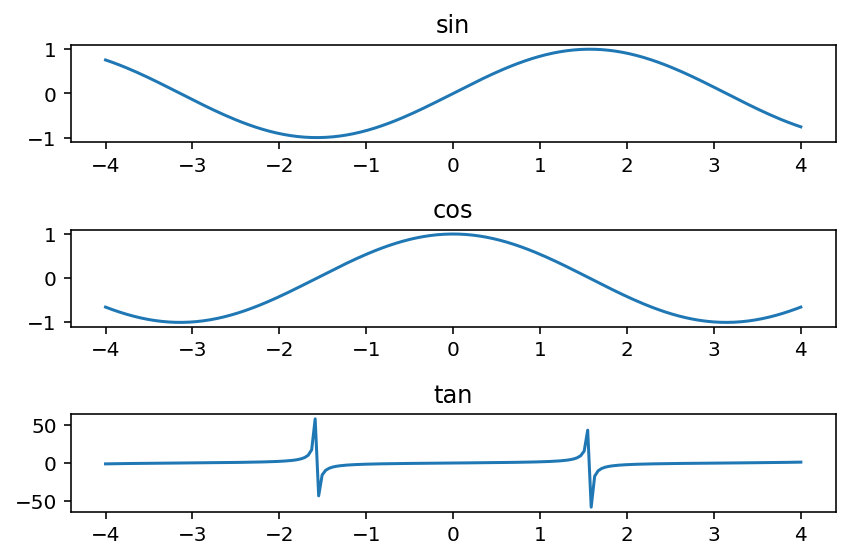

In [19]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(x, sin)
ax1.set_title("sin")
ax2.plot(x, cos)
ax2.set_title("cos")
ax3.plot(x, tan)
ax3.set_title("tan")
plt.tight_layout()

### Hyperbolic functions

Hyperbolic functions are like trigonometric functions but for the hyperbola rather than for the circle. `NumPy` also incorporate several cases (see [here](https://numpy.org/doc/stable/reference/routines.math.html#hyperbolic-functions)).

In [20]:
y = np.linspace(-4, 4, 200)
sinh = np.sinh(y)
cosh = np.cosh(y)
tanh = np.tanh(y)

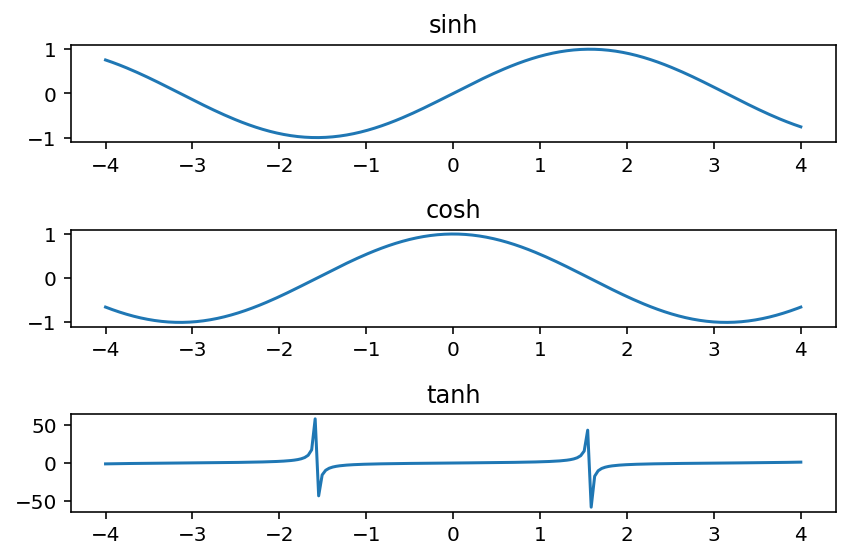

In [21]:
fig, (ax1, ax2, ax3) = plt.subplots(3, 1)
ax1.plot(y, sin)
ax1.set_title("sinh")
ax2.plot(y, cos)
ax2.set_title("cosh")
ax3.plot(y, tan)
ax3.set_title("tanh")
plt.tight_layout()

### Rounding

Rounding is delicate subject as rounding errors, when compounded over sequences of operations, can completely mess up your results. It is also a common operation for presenting and plotting results to others. Rounding is applied element-wise.

Let's generate a sequence of random decimal numbers to see the effect of different rounding procedures available in `NumPy` (see [here](https://numpy.org/doc/stable/reference/routines.math.html#rounding))

In [22]:
decimals = np.linspace(0.11111111, 0.99999999, 10)
around = np.around(decimals, 3)
round_ = np.round(decimals, 3)
rint = np.rint(decimals)
fix = np.fix(decimals)
floor = np.floor(decimals)
ceil = np.ceil(decimals)

In [23]:
print(f"Array of decimals:\n{decimals}\n")
print(f"'around' round to the fiven number of decimals:\n{around}\n")
print(f"'round' yields identical results than 'around':\n{round_}\n")
print(f"'rint' round to the nearest integer:\n{rint}\n")
print(f"'fix' round to the nearest integer towars zero:\n{fix}\n")
print(f"'floor' round to the floor of the input:\n{floor}\n")
print(f"'ceil' round to the ceiling of the input:\n{ceil}")

Array of decimals:
[0.11111111 0.20987654 0.30864197 0.4074074  0.50617283 0.60493827
 0.7037037  0.80246913 0.90123456 0.99999999]

'around' round to the fiven number of decimals:
[0.111 0.21  0.309 0.407 0.506 0.605 0.704 0.802 0.901 1.   ]

'round' yields identical results than 'around':
[0.111 0.21  0.309 0.407 0.506 0.605 0.704 0.802 0.901 1.   ]

'rint' round to the nearest integer:
[0. 0. 0. 0. 1. 1. 1. 1. 1. 1.]

'fix' round to the nearest integer towars zero:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

'floor' round to the floor of the input:
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]

'ceil' round to the ceiling of the input:
[1. 1. 1. 1. 1. 1. 1. 1. 1. 1.]


### Exponents and logarithms

Exponents and logarithms are often used in computations related to probability and statistics. `NumPy` incorporate several of the common ones (see [here](https://numpy.org/doc/stable/reference/routines.math.html#exponents-and-logarithms)).

In [24]:
z = np.array([0.1, 1, np.e, np.pi])
exp = np.exp(z)
expm1 = np.expm1(z)
exp2 = np.exp2(z)
log = np.log(z)
log10 = np.log10(z)
log2 = np.log2(z)

In [25]:
print(f'Compute exponential element-wise:\n{exp}\n')
print(f"Compute 'exp(x) - 1' with greater precision for small values:\n{expm1}\n")
print(f"Compute '2**p' for all elements p in the array:\n{exp2}\n")
print(f'Compute natural logarithm element-wise:\n{log}\n')
print(f'Compute base 10 logarithm element-wise:\n{log10}\n')
print(f'Compute base 2 logarithm element-wise:\n{log2}\n')

Compute exponential element-wise:
[ 1.10517092  2.71828183 15.15426224 23.14069263]

Compute 'exp(x) - 1' with greater precision for small values:
[ 0.10517092  1.71828183 14.15426224 22.14069263]

Compute '2**p' for all elements p in the array:
[1.07177346 2.         6.58088599 8.82497783]

Compute natural logarithm element-wise:
[-2.30258509  0.          1.          1.14472989]

Compute base 10 logarithm element-wise:
[-1.          0.          0.43429448  0.49714987]

Compute base 2 logarithm element-wise:
[-3.32192809  0.          1.44269504  1.65149613]



### Other miscellaneous element-wise operations

In [61]:
# sum_
# prod
# cumsum
# diff
# clip 
# sqrt
# cbrt
# square
# absolute
# fabs
# sign
# maximum
# minimum

## Array data type and conversions

I mentioned `NumPy` arrays can contain a single data type. This constraint makes data storing and manipulation much more efficient than working with mixed type arrays (like Python lists), which is a priority for `NumPy`. 

Data types in `NumPy` is a relatively complicated subject, particularly if you are not familiar with C or memory allocation. For our purposes, some basic data types are worth knowing: 

1. `np.bool_`: used to represent "Booleans" (True or False)
2. `np.int`: used to integers numbers 
3. `np.unit`: used to represent positive integers or "unsigned" integers
4. `np.float`: used to represent real numbers (decimals, fractions, etc) or "floating point" numbers  
5. `np.complex`: used to represent complex number

In my experience, booleans, integers, and float point data types, are the ones that you end up using the most. At least explicitly. Other data types are used all the time, but you do not have to worry about it because `NumPy` takes care of it for you. As Python is a "dynamically typed" language, which simply means that you do not have to tell the computer what data type you will use (Python does this for you), most of the time you have no need to indicate which data type you will use. 

For instance, if you simply define and array of values, `NumPy` will decide what data type to allocate for each:  

In [26]:
bools = np.array([True, False])
ints = np.full((2,2), 1)
floats = np.ones(5)
unsigned = np.arange(3, dtype=np.uint8)
complexs = np.array([+1j, +2j, +3j])
unicode = np.array(["Catbug", "Chris", "Danny", "Wallow", "Beth"])

In [27]:
print(f'Booleans :{bools.dtype}')
print(f'Integers :{ints.dtype}')
print(f'Floats :{floats.dtype}')
print(f'Unsigned :{unsigned.dtype}')
print(f'Complexs :{complexs.dtype}')
print(f'Unicode :{unicode.dtype}')

Booleans :bool
Integers :int64
Floats :float64
Unsigned :uint8
Complexs :complex128
Unicode :<U6


In some instances you may want to explicitly indicate the data type. Here are some examples of how you can do that:

In [28]:
int_16 = np.array([1, 2, 3, 4], dtype='int16')
float_32 = np.array([1, 2, 3, 4], dtype='float32')
unsigned_int_8 = np.arange(3, dtype='uint8')

In [29]:
print(f'Integer 16 bytes data type: { int_16.dtype}')
print(f'Float 32 bytes data type: {float_32.dtype}')
print(f'Unsigned integer 8 bytes data type: {unsigned_int_8.dtype}')

Integer 16 bytes data type: int16
Float 32 bytes data type: float32
Unsigned integer 8 bytes data type: uint8


Note that the numbers after the data type, like 8, 16, 32, and 64, indicate the number of bytes are allocated to represent each element of the array. The higher the number, the more memory.

There are several reasons why you may want to explicitly indicate the data type. One the most common reasons is **memory efficiency**. If you know your range of numbers in a variable are small positive numbers, utilizing an 8 bytes unsigned integers will use significantly less memory than a 32 bytes integer. Now, this will be an issue only with massive datasets, meaning datasets that make your computer to have difficulty processing your data, as it is not clear what "massive" means without context. 

A final operation you may want to do, is **to change the data type of an array**. For instance, let's say you want to stack two arrays, but one has floating point data type, and the other integers. Recall that `NumPy` arrays can have a single data type. Let's see an example.

In [30]:
int_array = np.arange(10, dtype='int')
float_array = np.arange(10, dtype='float')

In [31]:
print(f'Array 1: {int_array}, data type:{int_array.dtype}')
print(f'Array 2: {float_array}, data type:{float_array.dtype}')

Array 1: [0 1 2 3 4 5 6 7 8 9], data type:int64
Array 2: [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.], data type:float64


Let's first stack the arrays as they are

In [32]:
stacked_arrays = np.stack((int_array, float_array))

In [33]:
print(f'Stacked arrays as they are:\n{stacked_arrays},\ndata type:{stacked_arrays.dtype}')

Stacked arrays as they are:
[[0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]
 [0. 1. 2. 3. 4. 5. 6. 7. 8. 9.]],
data type:float64


As you can see, `NumPy` "upcasted" the data type of lower precision, the `int64`, to the data type of higher precision, the `float64`. This is simply because `int64` can't represent float point or real numbers, only integers or natural numbers. But `float64` can represent integers. So it is the smart choice to make things work. 

Now, you may want to keep everything as integers, for whatever reason. If so, this is what you need to do. First, convert the float64 array to a int64 array as:

In [34]:
int_array_2 = float_array.astype('int64')

And now stack things together. 

In [35]:
stacked_arrays_2 = np.stack((int_array, int_array_2))

In [36]:
print(f'Stacked arrays after conversion:\n{stacked_arrays_2},\ndata type:{stacked_arrays_2.dtype}')

Stacked arrays after conversion:
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]],
data type:int64


There you go, the array is composed by integers of 64 bytes now. 

Let's say you want to save memory by converting the new array to a **lower byte representation**, like int 8. This is known as "downcasting", i.e., the opposite of "upcasting". For this you simply need to:

In [37]:
stacked_arrays_3 = stacked_arrays_2.astype('int8')

In [38]:
print(f'Stacked arrays after downcasting:\n{stacked_arrays_3},\ndata type:{stacked_arrays_3.dtype}')

Stacked arrays after downcasting:
[[0 1 2 3 4 5 6 7 8 9]
 [0 1 2 3 4 5 6 7 8 9]],
data type:int8


You can check and compare the memory "footprint" of each array as:

In [39]:
print(f'Memory size Int64 array:{stacked_arrays_2.nbytes}')
print(f'Memory size Int8 array:{stacked_arrays_3.nbytes}')

Memory size Int64 array:160
Memory size Int8 array:20


The memory footprint has been reduced by a factor of 8. This may not sound like a lot, but if you are working with a dataset of size, let's say, 8 gigabytes, you can reduce such memory usage to only 1 gigabyte, which will also do data manipulation faster. 

## Array manipulation

The shape of an array is given by the number of elements along each axis. Now, if you think in a array as composed by little boxes or LEGO pieces, you can start to think if how those pieces can be rearranged in different shapes. For example, a 2 x 2 array could be "flattened" to be a 1 x 4 array, or maybe you could "swap" the rows and columns of the array, by moving the little boxes around, or even take away a couple of pieces reducing the array to a 1 x 2 shape.

These kind of operations are extremely common in any kind of data manipulation, and it is one of the most important skills to acquire. Some people prefer to convert `NumPy` arrays to `Pandas` DataFrames, as `Pandas` provide several easy to use functions to manipulate arrays. Nonetheless, manipulating arrays in `NumPy` it is not that much harder, it can save you time and effort by preventing you to going back and forth with `Pandas`, and well, this is a `NumPy` tutorial, so we are here to learn `NumPy` way. 

### Array shape manipulation

Arrays can be changed with or without changing is data. This is equivalent to the difference between rearranging LEGO blocks with or without adding/removing pieces. 

The `reshape` method changes the shape of an array *without* changing its data. 

In [40]:
array_1 = np.array([[1, 2, 3],
                    [4, 5, 6]])

print(f'Array-1 shape: {array_1.shape}')

Array-1 shape: (2, 3)


Array-1 has shape (2, 3), meaning it has 2 rows and 3 columns. 

In [41]:
# the two syntaxs below are equivalent
array_2 = array_1.reshape(3,2) 
array_3 = np.reshape(array_1, (1,6))

In [42]:
print(f'Array-2:\n{array_2},\nshape: {array_2.shape}\n')
print(f'Array-3:\n{array_3},\nshape: {array_3.shape}')

Array-2:
[[1 2]
 [3 4]
 [5 6]],
shape: (3, 2)

Array-3:
[[1 2 3 4 5 6]],
shape: (1, 6)


Array-2 and Array-3 preserve the number of elements of Array-1.

**Flattening** an array, this is, collapsing all values into a single axis or dimension, can be done in two manners. 

In [43]:
array_1_ravel = array_1.ravel()
array_1_flatt = array_1.flatten()

In [44]:
print(f'Array-1 ravel:\n{array_1_ravel},\nshape: {array_1_ravel.shape}\n')
print(f'Array-1 flattened:\n{array_1_flatt},\nshape: {array_1_flatt.shape}')

Array-1 ravel:
[1 2 3 4 5 6],
shape: (6,)

Array-1 flattened:
[1 2 3 4 5 6],
shape: (6,)


Why on earth are there two methods to do exactly the same? The answer is that they are not doing the same: `ravel()` returns a '**view**' of the original array, whereas `flatte()` returns an independent '**copy**' of it. Views or images are just "pointers" to the original array in memory, whereas copies have their own space in memory. I'll cover this in depth later.

Another thing you might have realized is that Array-3 has the same elements than Array-1-ravel and Array-1-flattened, but it has an extra pair of `[]` and shape `(1,6)` instead of `(,6)`. What is going on here? 

Put simply, internally, `NumPy` arrays have two parts: the information itself and information about how to interpret/read the array. In the case of the shape information, this indicates how many "indices" are associated with an array. The `(1,6)` is saying that there **two indices** identifying the array: the number 1 for all the elements, and the numbers from 1 to 6 for each individual element. This makes sense if you think in array as matrices or excel sheets: the first element is in the firs row and first column (1,1), the second in the first row and the second column (1, 2), and son on.

However, If you think about it, you don't need two indices to identify the elements of a one-dimensional array. After all, when we count things we do not count "1 and 1, 1 and 2, 1 and 3, 1 and 4..." and so on. The `(6,)` is just saying that there is a **single index** identifying each of the 6 elements of the array, which makes perfect sense. The first element of the array is in position one (1,), the second in position two (2,), and so on. 

Now you may be wondering. Why then to add a 1 as an index if it's unnecessary? Since `NumPy` supports multi-dimensional arrays, technically, the `(1,6)` is indicating the array has TWO dimensions or axes instead of one. "BUT, the array has just one dimension, right?" Yes and no. The thing is such array can be represented as either: as a collection of elements along one dimension or as collection of elements along two dimensions, with the caveat that the first dimension has all the data, and the other is basically "empty" or "flat", but assigned to it. Just like with the the first element is in the firs row and first column (1,1)" idea. 

If you are familiar with linear algebra or geometry, you should now that a square is an object with two dimensions, but that can 'live' in three, four, five, a million, or any number of dimensions. Essentially, higher-dimensional spaces can contain objects with less dimensions, but not the other way around. You can't fit an sphere in a plane. The misunderstanding, in my view, comes from the tendency to think in data as two-dimensional grid-like objects, when in practice does not need to be like that *necessarily*. People like to think in `NumPy` arrays as matrices, vectors, tensors, etc., but they aren't, they are arrays with one or more dimensions. Period. 

This whole discussion may sound like I am beating around the bushes, but I am not. Dimensionality mismatch is one of the most important sources of errors, misunderstandings, and frustrations when working with `NumPy` arrays. If you ever do anything related to linear algebra, like pretty much all of machine learning and statistics, you need to have a firm understanding of how dimensions work in `NumPy`. 

### Array transpose-like operations

**Transposing** means to "swap" or interchange the position and elements between two or more axes. 

The most common operation is the plain **Transpose** operation, where the axes get permuted.  

In [45]:
array_1 = np.arange(4).reshape((2,2))# two dimensional array
array_2 = np.arange(12).reshape((3,2,2)) # three dimensional array

In [46]:
print(f'Array-1:\n{array_1},\nshape:{array_1.shape}\n')
print(f'Array-2:\n{array_2},\nshape:{array_2.shape}')

Array-1:
[[0 1]
 [2 3]],
shape:(2, 2)

Array-2:
[[[ 0  1]
  [ 2  3]]

 [[ 4  5]
  [ 6  7]]

 [[ 8  9]
  [10 11]]],
shape:(3, 2, 2)


Now let's transpose both.

In [47]:
array_1_T = array_1.T
array_2_T = array_2.T

In [48]:
print(f'Array-1 transposed:\n{array_1_T},\nshape:{array_1_T.shape}\n')
print(f'Array-2 transposed:\n{array_2_T},\nshape:{array_2_T.shape}')

Array-1 transposed:
[[0 2]
 [1 3]],
shape:(2, 2)

Array-2 transposed:
[[[ 0  4  8]
  [ 2  6 10]]

 [[ 1  5  9]
  [ 3  7 11]]],
shape:(2, 2, 3)


Array-1 has swap the rows for the columns. Array-2 has reshaped from a three 2x2 arrays, into two 2x3 arrays. This is because the indices "cycle" such that the third index pass to the first place, the second to the third, and the first to the second.

The `moveaxis` method is more flexible than transpose as allows for an arbitrary rearrangement of axes to new positions. The syntax is simple: `np.moveaxis(original-array, origin-position-axis-to-move, destiny-position-axis-to-move)`. Recall that axes are index as (0, 1, 2, ...0).

In [49]:
array_move_2_3_4 = np.arange(24).reshape((2,3,4))
array_move_2_4_3 = np.moveaxis(array_move_2_3_4, 2, 1) # move axis in position two to position one
array_move_3_2_4 = np.moveaxis(array_move_2_3_4, 0, 1) # move axis in position zero to position one
array_move_3_4_2 = np.moveaxis(array_move_2_3_4, 0, 2) # move axist in the zero position to position two
array_move_4_2_3 = np.moveaxis(array_move_2_3_4, [2, 1], [0, 2]) # move axes in positions two and one, to positions zero and two
array_move_4_3_2 = np.moveaxis(array_move_2_3_4, [2, 0], [0, 2]) # move axes in positions two and zero, to positions zero and two

In [50]:
print(f'Original order: {array_move_2_3_4.shape}\n')
print(f'New axes order 1: {array_move_2_4_3.shape}\n')
print(f'New axes order 2: {array_move_3_2_4.shape}\n')
print(f'New axes order 3: {array_move_3_4_2.shape}\n')
print(f'New axes order 4: {array_move_4_2_3.shape}\n')
print(f'New axes order 5: {array_move_4_3_2.shape}')

Original order: (2, 3, 4)

New axes order 1: (2, 4, 3)

New axes order 2: (3, 2, 4)

New axes order 3: (3, 4, 2)

New axes order 4: (4, 2, 3)

New axes order 5: (4, 3, 2)


### Array dimension manipulation

Intentionally changing the dimensions of arrays is an operation done mostly, in my experience, when you want to combine arrays or to do mathematical operations with two or more arrays. In the dimensions do not match or are not defined in certain manner, joining or calculations won't work, or would work in unexpected manners.

In this section I'll mention just two operations: **expanding dimensions** and **squeezing dimensions**, which are opposite operations. There is a third extremely important dimension manipulation operation: broadcasting. Broadcasting is not just important but rather complicated to explain so I will give its own section after this one. 

Expanding dimensions it is always possible as higher-dimensional objects can always contain lower-dimensional objects: you can fit a two-dimensional piece of paper inside a three-dimensional box, but not the other way around (I know! paper is three dimensional, but I hope you get the point).  

In [51]:
array_one = np.array([1, 2, 3])
array_two = np.array([[1, 2, 3], [4, 5, 6]])
array_one_expand =  np.expand_dims(array_one, axis=0)
array_two_expand =  np.expand_dims(array_two, axis=0)

In [52]:
print(f'One dimensional array: \n{array_one} \nshape: {array_one.shape}\n')
print(f'One dimensional array expanded: \n{array_one_expand} \nshape: {array_one_expand.shape}\n')
print(f'Two dimensional array: \n{array_two} \nshape: {array_two.shape}\n')
print(f'Two dimensional array expanded: \n{array_two_expand} \nshape: {array_two_expand.shape}\n')

One dimensional array: 
[1 2 3] 
shape: (3,)

One dimensional array expanded: 
[[1 2 3]] 
shape: (1, 3)

Two dimensional array: 
[[1 2 3]
 [4 5 6]] 
shape: (2, 3)

Two dimensional array expanded: 
[[[1 2 3]
  [4 5 6]]] 
shape: (1, 2, 3)



As you can see, both arrays gain an extra dimension when expanded. 

Let's bring the arrays back to their original dimensionality with the opposite operation: squeezing. 

In [53]:
array_one_squeez =  np.squeeze(array_one_expand, axis=0)
array_two_squeez =  np.squeeze(array_two_expand, axis=0)

In [54]:
print(f'Three dimensional array squeezed: \n{array_one_squeez} \nshape: {array_one_squeez.shape}\n')
print(f'Three dimensional array squeezed: \n{array_two_squeez} \nshape: {array_two_squeez.shape}')

Three dimensional array squeezed: 
[1 2 3] 
shape: (3,)

Three dimensional array squeezed: 
[[1 2 3]
 [4 5 6]] 
shape: (2, 3)


We can check the squeezed arrays have the same dimensionality that the original ones as:

In [55]:
print(f'Are dimensions for array-one and array-one-squeezed equal?: {array_one.shape == array_one_squeez.shape}\n')
print(f'Are dimensions for array-two and array-two-squeezed equal?: {array_two.shape == array_two_squeez.shape}')

Are dimensions for array-one and array-one-squeezed equal?: True

Are dimensions for array-two and array-two-squeezed equal?: True


### Array broadcasting

**Broadcasting** is an automatic `NumPy` mechanism to match the dimensionality of arrays with different shapes during arithmetic operations. Broadcasting usually improves speed by means of vectorizing operations that usually will be approached by looping, which is resource intensive and slow. 



https://numpy.org/doc/stable/user/basics.broadcasting.html  
https://numpy.org/doc/stable/reference/ufuncs.html#broadcasting

In [56]:
### Joining arrays

In [57]:
### Splitting arrays

In [58]:
### Tiling arrays

In [59]:
### Adding and removing elements

In [60]:
### Rearranging elements

https://numpy.org/doc/stable/user/quickstart.html#shape-manipulation  
https://numpy.org/doc/stable/reference/routines.array-manipulation.html  
https://numpy.org/doc/stable/reference/routines.sort.html  
https://numpy.org/doc/stable/reference/generated/numpy.pad.html#numpy.pad  

## Array arithmetic

https://numpy.org/doc/stable/user/quickstart.html#basic-operations

## NumPy universal functions

https://numpy.org/doc/stable/user/quickstart.html#universal-functions  
https://numpy.org/doc/stable/reference/c-api/generalized-ufuncs.html  
https://numpy.org/doc/stable/reference/ufuncs.html#available-ufuncs

## Array copy and views

https://numpy.org/doc/stable/user/quickstart.html#copies-and-views

## Array logic and evaluation

https://numpy.org/doc/stable/reference/routines.logic.html

## Basic statistics operations

https://numpy.org/doc/stable/reference/routines.statistics.html

## Basic linear algebra operations

https://numpy.org/doc/stable/reference/routines.linalg.html  
https://numpy.org/doc/stable/user/quickstart.html#vector-stacking


## Array indexing

https://numpy.org/doc/stable/user/basics.indexing.html  
https://numpy.org/doc/stable/user/basics.indexing.html#basics-indexing   
https://numpy.org/doc/stable/reference/arrays.indexing.html

## String operations

https://numpy.org/doc/stable/reference/routines.char.html

## Datetime functions

https://numpy.org/doc/stable/reference/routines.datetime.html

## Structured arrays

https://numpy.org/doc/stable/user/basics.rec.html

## Input-output (I/O) processing (load and read data)

https://numpy.org/doc/stable/user/basics.io.html  
https://numpy.org/doc/stable/reference/routines.io.html

## Random sampling

https://numpy.org/doc/stable/reference/random/index.html

## Array masking

https://numpy.org/doc/stable/reference/routines.ma.html

## NumPy constants and scalars

https://numpy.org/doc/stable/reference/constants.html  
https://numpy.org/doc/stable/reference/arrays.scalars.html

## Array Iteration

https://numpy.org/doc/stable/user/c-info.beyond-basics.html